In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("/content/NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [4]:
df.shape

(5044, 7)

In [5]:
(1009, 7)

(1009, 7)

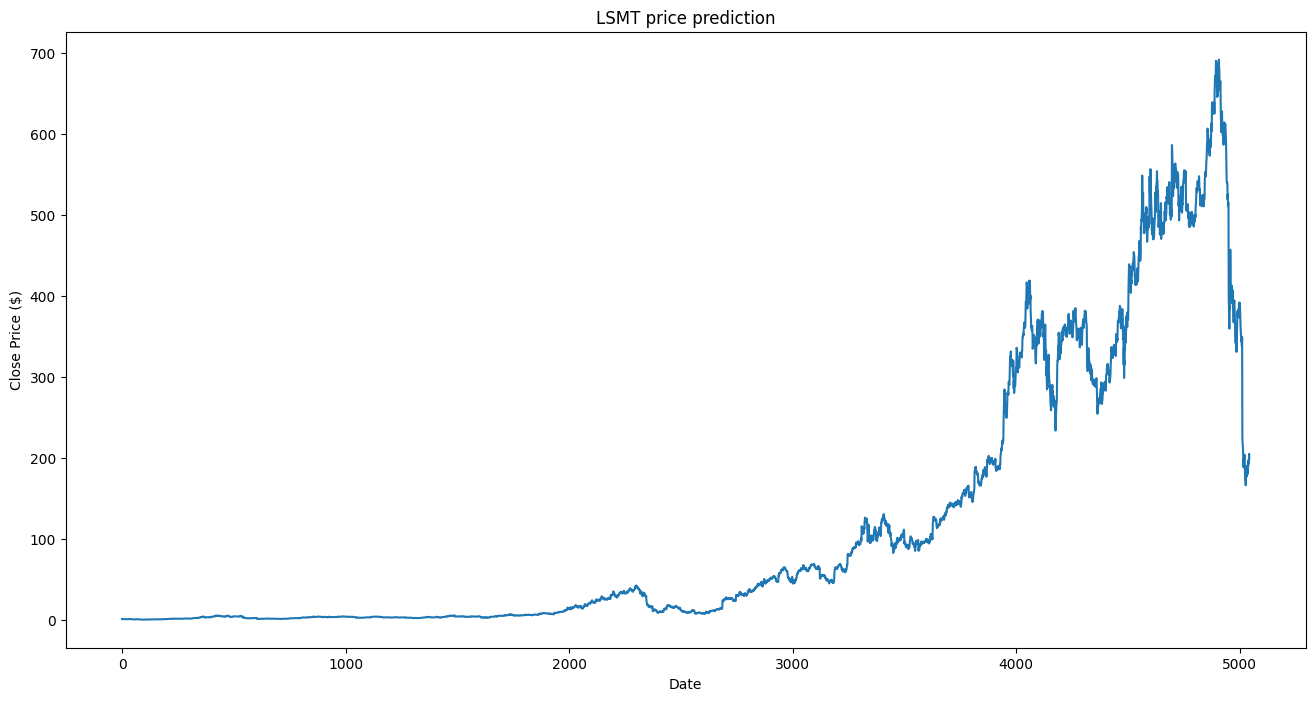

In [6]:
plt.figure(figsize=(16,8))
plt.title('LSMT price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(df["Close"])
plt.show()

In [7]:
data=df.filter(['Close'])
dataset=data.values

In [8]:
training_data_len =math.ceil(len(dataset)*0.8)
training_data_len


4036

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data


array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.2785077 ],
       [0.29612623],
       [0.28728803]])

In [12]:
train_data=scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.00119131, 0.00121094, 0.00113448, 0.00105699, 0.00101049,
       0.00101773, 0.00109315, 0.00107765, 0.00112002, 0.00117064,
       0.00107869, 0.00113345, 0.00112931, 0.00104149, 0.00102703,
       0.00088754, 0.00079455, 0.00077802, 0.00083691, 0.00084518,
       0.00087721, 0.00087617, 0.00085551, 0.00089064, 0.00082555,
       0.00090614, 0.00094747, 0.00115721, 0.00121714, 0.00130703,
       0.00116134, 0.00113965, 0.00114378, 0.0012967 , 0.00120784,
       0.00111382, 0.00109005, 0.00103632, 0.00112312, 0.00113861,
       0.00115411, 0.00111898, 0.00107249, 0.00095987, 0.00072119,
       0.00072842, 0.00078318, 0.00084001, 0.00075012, 0.00058584,
       0.00058171, 0.00056104, 0.00060857, 0.0006127 , 0.00059927,
       0.00055588, 0.00057861, 0.00066643, 0.00073772, 0.00078112])]
[0.0008813407918589954]



In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [14]:
x_train =np.reshape(x_train, newshape= (x_train.shape[0],x_train.shape[1],1))
x_train.shape


(3976, 60, 1)

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, epochs=1, batch_size=1)

3976/3976 [==============================] - 150s 37ms/step - loss: 2.8632e-04


In [18]:
test_data =scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [19]:
x_test =np.array(x_test)

In [20]:
x_test= np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [21]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

32/32 [==============================] - 2s 25ms/step


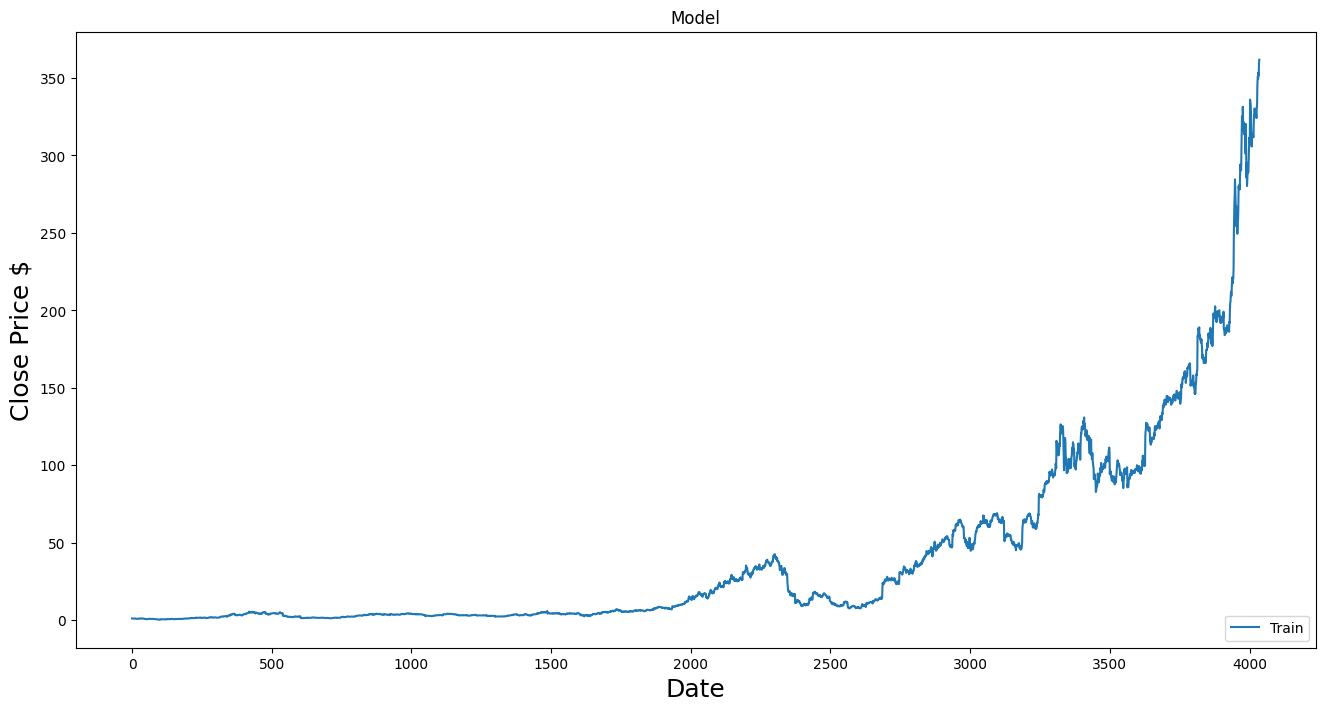

In [22]:
train=data[:training_data_len]
valid=data[training_data_len:]

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()